In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyngrok -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 25.2 MB/s eta 0:00:00


**Now here’s how to collect stock price data:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=3650)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data_stock = yf.download('TSLA', start=start_date, end=end_date, progress=False)
data_stock["Date"] = data_stock.index
data_stock = data_stock[["Date", "Open", "High", "Low",
             "Close", "Adj Close", "Volume"]]
data_stock.reset_index(drop=True, inplace=True)
data_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-07-23,8.266667,8.370667,8.121333,8.182667,8.182667,116046000
1,2013-07-24,8.298000,8.300000,7.970667,8.113333,8.113333,103035000
2,2013-07-25,8.026667,8.316667,8.012667,8.271333,8.271333,79264500
3,2013-07-26,8.542667,8.712000,8.440667,8.626000,8.626000,144496500
4,2013-07-29,8.621333,9.024667,8.550000,8.974667,8.974667,145183500


In [ ]:
data_stock.drop(["Date", "Adj Close"], axis = 1, inplace = True)

<ipython-input-6-363e677e0518>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stock.drop(["Date", "Adj Close"], axis = 1, inplace = True)


In [ ]:
data_stock.head()

,Open,High,Low,Close,Volume
0,8.266667,8.370667,8.121333,8.182667,116046000
1,8.298000,8.300000,7.970667,8.113333,103035000
2,8.026667,8.316667,8.012667,8.271333,79264500
3,8.542667,8.712000,8.440667,8.626000,144496500
4,8.621333,9.024667,8.550000,8.974667,145183500


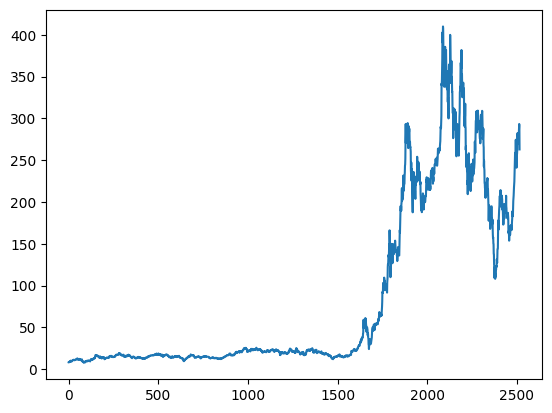

In [ ]:
plt.plot(data_stock.Close)

In [ ]:
ma100 = data_stock.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2511    204.2811
2512    205.2112
2513    206.1360
2514    207.0279
2515    207.6881
Name: Close, Length: 2516, dtype: float64

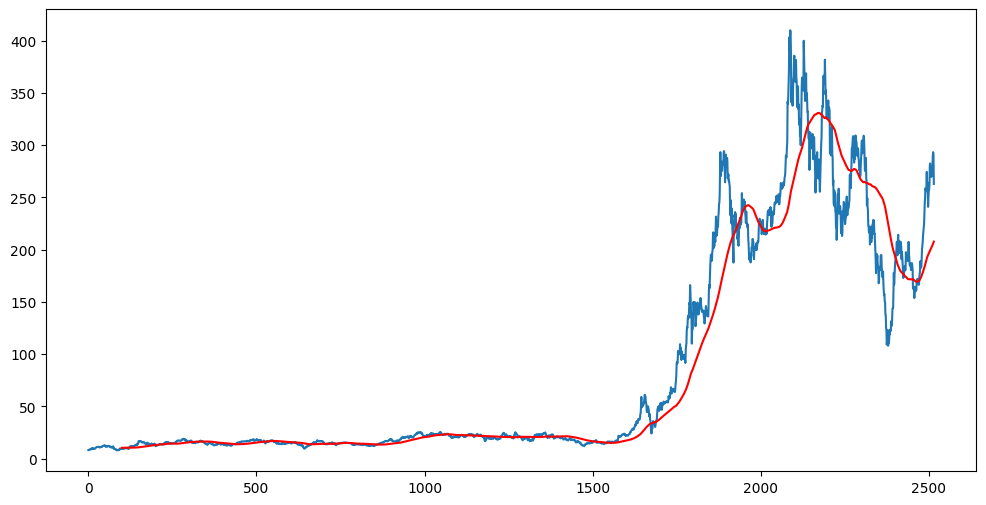

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(data_stock.Close)
plt.plot(ma100, 'r')

In [ ]:
ma200 = data_stock.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    193.65015
2512    193.68735
2513    193.71500
2514    193.83025
2515    193.81850
Name: Close, Length: 2516, dtype: float64

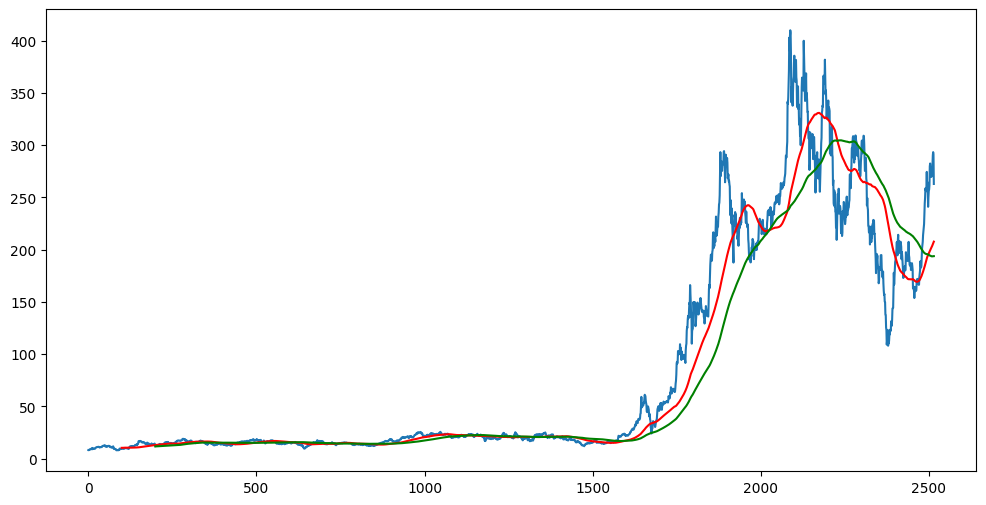

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(data_stock.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
data_stock.shape

(2516, 5)

In [ ]:
#Spliting data into Training and Testing
data_training = pd.DataFrame(data_stock['Close'][0:int(len(data_stock)*0.70)])
data_testing = pd.DataFrame(data_stock['Close'][int(len(data_stock)*0.70):int(len(data_stock))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [ ]:
data_training.head()

,Close
0,8.182667
1,8.113333
2,8.271333
3,8.626000
4,8.974667


In [ ]:
data_testing.head()

,Close
1761,104.557335
1762,106.155334
1763,100.871330
1764,94.466667
1765,102.639999


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[1.47127048e-03],
       [7.88176588e-04],
       [2.34482676e-03],
       ...,
       [9.06495869e-01],
       [9.06627260e-01],
       [1.00000000e+00]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(1661, 100, 1)

# **ML Model**

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation= 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation= 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation= 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 50, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 40s 529ms/step - loss: 0.0087
Epoch 2/50
52/52 [==============================] - 23s 451ms/step - loss: 0.0030
Epoch 3/50
52/52 [==============================] - 17s 321ms/step - loss: 0.0028
Epoch 4/50
52/52 [==============================] - 15s 284ms/step - loss: 0.0027
Epoch 5/50
52/52 [==============================] - 18s 343ms/step - loss: 0.0019
Epoch 6/50
52/52 [==============================] - 15s 278ms/step - loss: 0.0023
Epoch 7/50
52/52 [==============================] - 15s 291ms/step - loss: 0.0021
Epoch 8/50
52/52 [==============================] - 14s 274ms/step - loss: 0.0025
Epoch 9/50
52/52 [==============================] - 15s 290ms/step - loss: 0.0023
Epoch 10/50
52/52 [==============================] - 16s 300ms/step - loss: 0.0021
Epoch 11/50
52/52 [==============================] - 15s 288ms/step - loss: 0.0019
Epoch 12/50
52/52 [==============================] - 15s 285ms/step - loss: 0.0021
Epoch 13/50
5

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

,Close
1761,104.557335
1762,106.155334
1763,100.871330
1764,94.466667
1765,102.639999


In [ ]:
data_training.tail(100)

,Close
1661,45.266666
1662,44.532665
1663,49.574669
1664,49.700668
1665,49.966667
...,...
1756,101.120003
1757,103.067329
1758,100.042664
1759,100.056000


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [ ]:
final_df.head()

,Close
0,45.266666
1,44.532665
2,49.574669
3,49.700668
4,49.966667


In [ ]:
input_data = scaler.fit_transform(final_df)

In [ ]:
input_data.shape

(855, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


# **Making Predictions**

In [ ]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 2s 65ms/step


In [ ]:
y_predicted.shape

(755, 1)

In [ ]:
y_test

array([0.2085472 , 0.21268829, 0.19899521, 0.18239803, 0.20357858,
       0.19267562, 0.19658347, 0.19457598, 0.18477524, 0.19414581,
       0.19449132, 0.19414927, 0.19493706, 0.18856735, 0.18266927,
       0.17503667, 0.20619764, 0.21764135, 0.2227741 , 0.25472286,
       0.26361144, 0.26213261, 0.28343409, 0.29175253, 0.28557114,
       0.28715017, 0.30957978, 0.32436471, 0.3199852 , 0.36804745,
       0.34794666, 0.32403647, 0.28916459, 0.29894288, 0.22283284,
       0.25399035, 0.25836122, 0.25955327, 0.30006583, 0.32610096,
       0.31919049, 0.30335691, 0.31952739, 0.32578134, 0.30404798,
       0.26615276, 0.27257085, 0.28945827, 0.30143062, 0.29959073,
       0.30817695, 0.32471889, 0.29615276, 0.30530047, 0.29519395,
       0.30497223, 0.30550779, 0.31248738, 0.31965697, 0.32341452,
       0.33606929, 0.32534081, 0.31738516, 0.3097491 , 0.30206986,
       0.30267453, 0.30539549, 0.30093828, 0.30063595, 0.30443668,
       0.28831804, 0.29247295, 0.27278679, 0.28355845, 0.30376

In [ ]:
y_predicted

array([[0.19559717],
       [0.1994116 ],
       [0.20238498],
       [0.20424053],
       [0.20434281],
       [0.20305613],
       [0.20069373],
       [0.19775245],
       [0.1946605 ],
       [0.19148034],
       [0.18854806],
       [0.18618132],
       [0.18455377],
       [0.1837149 ],
       [0.18340549],
       [0.18318012],
       [0.18252239],
       [0.18208882],
       [0.18275283],
       [0.18504792],
       [0.18961817],
       [0.19676083],
       [0.20602947],
       [0.21707347],
       [0.22942814],
       [0.2420499 ],
       [0.25388816],
       [0.26478878],
       [0.275066  ],
       [0.28459302],
       [0.29446137],
       [0.30448824],
       [0.31311008],
       [0.31771353],
       [0.3175514 ],
       [0.31070417],
       [0.29811627],
       [0.28194383],
       [0.26481587],
       [0.2503667 ],
       [0.24185401],
       [0.24051148],
       [0.24537045],
       [0.2550281 ],
       [0.26766577],
       [0.28057456],
       [0.29019818],
       [0.295

In [ ]:
scaler = scaler.scale_

In [ ]:
scale_factor = 1/scaler[0]
y_predicted = y_predicted * scale_factor
y_test = y_test *  scale_factor

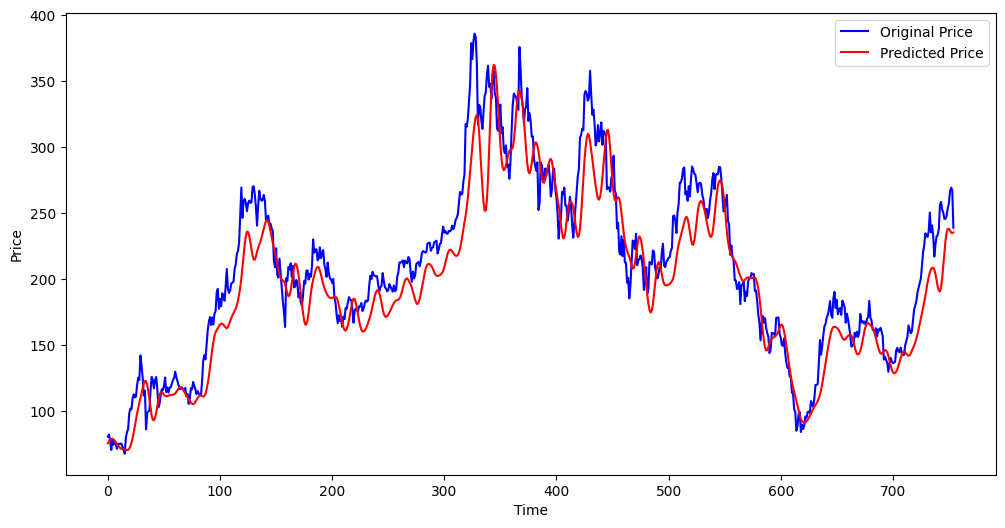

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
%%writefile app.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from keras.models import load_model
import streamlit as st
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=3660)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

st.title('Stock Trend Prediction')
user_input = st.text_input('Enter the Stock Ticker', 'AAPL')
data_stock = yf.download(user_input, start=start_date, end=end_date, progress=False)

#Describing Data
st.subheader('Data from past 10 years.')
st.write(data_stock.describe)

#Visualizations
st.subheader('Closing Price vs Time Chart')
fig = plt.figure(figsize=(12,6))
plt.plot(data_stock.Close)
st.pyplot(fig)

st.subheader('Closing Price vs Time Chart with 100MA')
ma100 = data_stock.Close.rolling(100).mean()
fig = plt.figure(figsize=(12,6))
plt.plot(ma100)
plt.plot(data_stock.Close)
st.pyplot(fig)

st.subheader('Closing Price vs Time Chart with 100MA & 200MA')
ma100 = data_stock.Close.rolling(100).mean()
ma200 = data_stock.Close.rolling(200).mean()
fig = plt.figure(figsize=(12,6))
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.plot(data_stock.Close, 'b')
st.pyplot(fig)

#Spliting data into Training and Testing
data_training = pd.DataFrame(data_stock['Close'][0:int(len(data_stock)*0.70)])
data_testing = pd.DataFrame(data_stock['Close'][int(len(data_stock)*0.70):int(len(data_stock))])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_training_array = scaler.fit_transform(data_training)

#Load My Model
model = load_model('keras_model.h5')

#Testing Part
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing, ignore_index=True)
input_data = scaler.fit_transform(final_df)

x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

#Making Predictions
y_predicted = model.predict(x_test)
scaler = scaler.scale_
scale_factor = 1/scaler[0]
y_predicted = y_predicted * scale_factor
y_test = y_test *  scale_factor

#Final Graph
st.subheader('Prediction vs Original')
fig2 = plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
st.pyplot(fig2)

Overwriting app.py


In [ ]:
!ngrok authtoken 2Sk96gNAMk0tyfQN0p0dKzq17IX_6NTCFb3ggVhYhcv854xAs

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!ngrok

NAME:
  ngrok - tunnel local ports to public URLs and inspect traffic

USAGE:
  ngrok [command] [flags]

DESCRIPTION: 
  ngrok exposes local networked services behinds NATs and firewalls to the
  public internet over a secure tunnel. Share local websites, build/test
  webhook consumers and self-host personal services.
  Detailed help for each command is available with 'ngrok help <command>'.
  Open http://localhost:4040 for ngrok's web interface to inspect traffic.

Author:
  ngrok - <support@ngrok.com>

TERMS OF SERVICE: https://ngrok.com/tos

EXAMPLES: 
  ngrok http 80                           # secure public URL for port 80 web server
  ngrok http --domain baz.ngrok.dev 8080  # port 8080 available at baz.ngrok.dev
  ngrok http foo.dev:80                   # tunnel to host:port instead of localhost
  ngrok http https://localhost            # expose a local https server
  ngrok tcp 22                            # tunnel arbitrary TCP traffic to port 22
  ngrok tls --domain=foo.com 44

In [ ]:
from pyngrok import ngrok

In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
!pgrep streamlit

5322


In [ ]:
public_url = ngrok.connect(addr='localhost:8501')
public_url

<NgrokTunnel: "https://7576-35-237-49-55.ngrok-free.app" -> "http://localhost:8501">

In [1]:
!kill 5322

/bin/bash: line 1: kill: (5322) - No such process
